In [1]:
#data_preprocessing.py

import pandas as pd
from sklearn.preprocessing import StandardScaler

#Load dataset
df = pd.read_csv("heart.csv")

#Basic data info
print(df.head())
print(df.info())
print(df.describe())

#Check for missing values
print(df.isnull().sum())

#Feature scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.drop('target', axis=1))

#Convert scaled features into DataFrame
import numpy as np
X = pd.DataFrame(scaled_features, columns=df.columns[:-1])
y = df['target']

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5 

In [18]:
#build_model.py

import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Load Dataset
df = pd.read_csv('heart.csv')

#Split Features and Target
X = df.drop('target', axis=1)
y = df['target']

#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Train Model (Random Forest)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

#Evaluate Model
y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)

print("Model Trained Successfully!")
print("Accuracy:", round(acc, 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

#Save Model and Scaler
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\n Model and Scaler saved as 'model.pkl' and 'scaler.pkl'")


Model Trained Successfully!
Accuracy: 0.8361

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61

Confusion Matrix:
 [[24  5]
 [ 5 27]]

 Model and Scaler saved as 'model.pkl' and 'scaler.pkl'


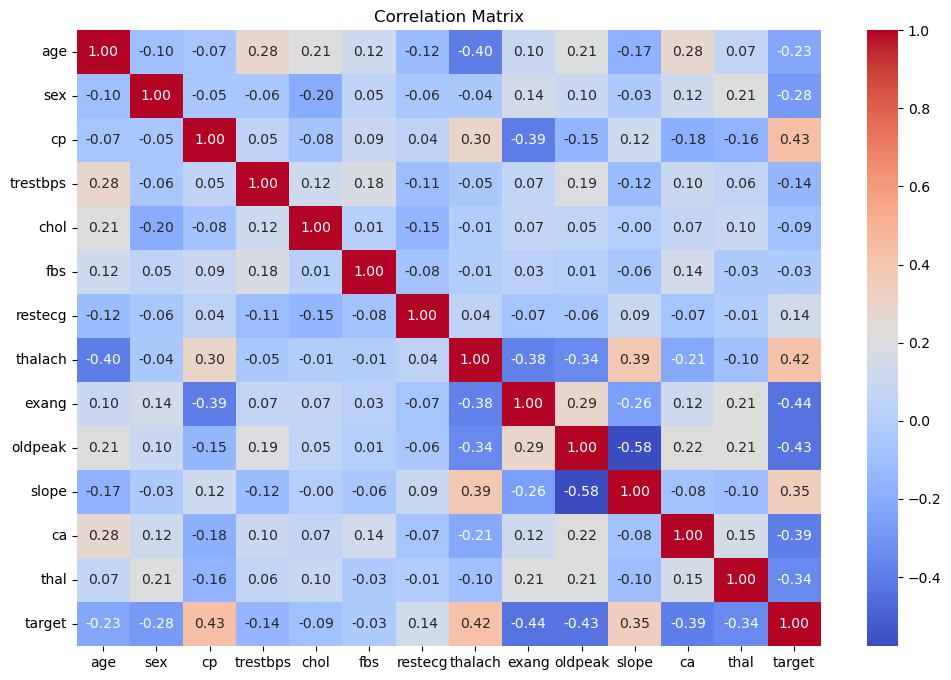

In [13]:

#exploratory_data_analysis.py

import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv("heart.csv")

#Correlation heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()



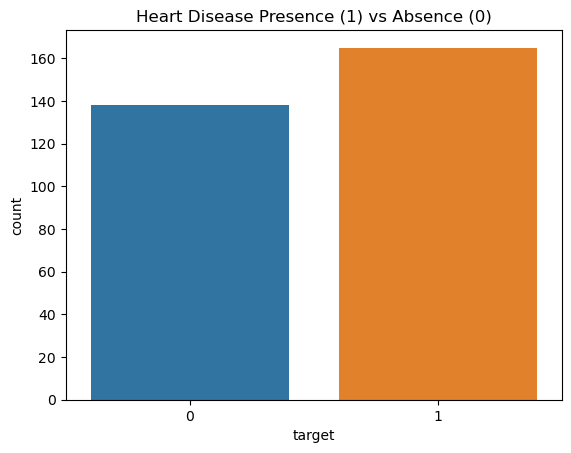

In [14]:
#Count plot of target variable

sns.countplot(x='target', data=df)
plt.title("Heart Disease Presence (1) vs Absence (0)")
plt.show()

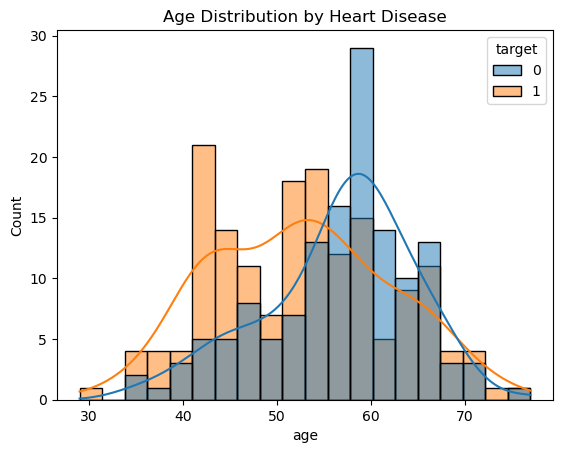

In [15]:
#Age distribution by target

sns.histplot(data=df, x='age', hue='target', bins=20, kde=True)
plt.title("Age Distribution by Heart Disease")
plt.show()

In [19]:
#model_comparison.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import pickle

#Load dataset
df = pd.read_csv("heart.csv")

#Split features and target
X = df.drop('target', axis=1)
y = df['target']

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#List of models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

results = []

#Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1-Score": round(f1, 4)
    })

#Show model comparison
results_df = pd.DataFrame(results).sort_values(by="Accuracy", ascending=False)
print("\nModel Performance Comparison:\n")
print(results_df.to_string(index=False))

#Save best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
print(f"\n Best Model: {best_model_name}")

#Save the trained best model as model.pkl
with open("model.pkl", "wb") as f:
    pickle.dump(best_model, f)

#Save the scaler (if needed in your Streamlit app)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)



Model Performance Comparison:

                 Model  Accuracy  Precision  Recall  F1-Score
   K-Nearest Neighbors    0.9016     0.9333  0.8750    0.9032
Support Vector Machine    0.8689     0.9000  0.8438    0.8710
           Naive Bayes    0.8689     0.9000  0.8438    0.8710
   Logistic Regression    0.8525     0.8710  0.8438    0.8571
         Random Forest    0.8525     0.8485  0.8750    0.8615
         Decision Tree    0.8197     0.8889  0.7500    0.8136
     Gradient Boosting    0.7869     0.8065  0.7812    0.7937

 Best Model: K-Nearest Neighbors
